In [1]:
from WebScrapping.Twint import TwintScrapper
from DataProcessing.NLP import NLP
from DataVisualization.GraphGenerator import GraphGenerator
import nest_asyncio
nest_asyncio.apply()

/home/usuario/.local/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# Create a Twint Scrapper object
# Currently if we run the file MainScrapping.py it gives an error with dates, currently looking how to fix it

scrapper = TwintScrapper()

In [3]:
# Define our search parameters
user = "Max33Verstappen"
start_date = "2021-07-01"
end_sate = "2021-07-15"

In [4]:
# Create post Data Frame
MV_posts = scrapper.search_user_posts(user, start_date, end_sate, False)
MV_posts.head(10)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


,id,conversation_id,date,tweet,nretweets,nlikes,nreplies
0,1415328851027283969,1415328851027283969,2021-07-14 10:14:28,Heading into a weekend at Silverstone that pro...,648,16721,113
1,1414864523471859718,1414864523471859718,2021-07-13 03:29:23,Coming soon,193,5445,39
2,1411715933790511108,1411715933790511108,2021-07-04 10:58:01,What an incredible win! 🔥 Simply an amazing jo...,4035,44839,596
3,1411601875732942849,1411601875732942849,2021-07-04 03:24:48,Focus &amp; Full Send for R A C E D A Y 🦁 #Unl...,578,11655,163
4,1411344431752650754,1411344431752650754,2021-07-03 10:21:48,"P1 🔥 It was a bit too close for comfort, as it...",2121,32985,351
5,1411252818913202179,1411252818913202179,2021-07-03 04:17:46,Q U A L I D A Y 💪 Looks like it will be tight ...,540,11923,156
6,1410990220938448901,1410990220938448901,2021-07-02 10:54:18,"We had a decent start of the weekend, I felt g...",577,14717,108
7,1410883108547829760,1410883108547829760,2021-07-02 03:48:40,Back at the Red Bull Ring! But it will be a ne...,548,11949,132
8,1410609423148453892,1410604169031942150,2021-07-01 09:41:08,@brrrake Redbull what else mate c’mon 🤷🏻‍♂️🤷🏻‍♂️😎,100,3059,44


In [5]:
# Create replies Data Frame
MV_replies = scrapper.search_replies_to(user, start_date, end_sate, False, "")

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [6]:
MV_replies.head(10)

,conversation_id,tweet,name
0,1415328851027283969,@Max33Verstappen @redbullracing Vamos ser camp...,Edu Correia
1,1415328851027283969,@Max33Verstappen @redbullracing The new qualif...,Louise Morgan
2,1415328851027283969,@Max33Verstappen @redbullracing Own that fraud...,tax evasion expert 🇸🇴
3,1415328851027283969,@Max33Verstappen @redbullracing Push to be cen...,Harbie
4,1415328851027283969,@Max33Verstappen @redbullracing Exacto https:...,RICAORDOR
5,1415328851027283969,@Max33Verstappen @redbullracing Me after seein...,🆁🅰🅼🅸🆃🅰🆂 🅳🅴 🆀🆄🅴🆂🅾
6,1415328851027283969,@Max33Verstappen @redbullracing Is that a Merc...,Alax
7,1415328851027283969,@Max33Verstappen @redbullracing 1. Pole 1. Fin...,A J
8,1415328851027283969,@Max33Verstappen @redbullracing Go get them ag...,FanOfTech
9,1415328851027283969,@Max33Verstappen @redbullracing Go for it Max💪...,Corrine Dokter


In [7]:
MV_replies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  2304 non-null   object
 1   tweet            2304 non-null   object
 2   name             2304 non-null   object
dtypes: object(3)
memory usage: 54.1+ KB


In [8]:
# Now we are going to 'normalize' our Data Frames

In [9]:
scrapper.clean_df_replies(MV_replies)
MV_replies

,conversation_id,tweet,name,gender,sentiment
0,1415328851027283969,Vamos ser campeão Max.,Edu Correia,unknown,Neutral
1,1415328851027283969,The new qualifying format for the British GP...,Louise Morgan,female,Positive
2,1415328851027283969,Own that fraud Lewis,tax evasion expert 🇸🇴,unknown,Positive
3,1415328851027283969,Push to be center of podium 💪💪💪💪💪,Harbie,unknown,Negative
4,1415328851027283969,Exacto,RICAORDOR,unknown,Neutral
...,...,...,...,...,...
2299,1410152129571008512,Gostoso,csbl,unknown,Neutral
2300,1410152129571008512,"Necesito la mía, la puedes enviar??",Igor Herrera,male,Neutral
2301,1410152129571008512,Como consigo esse agasalho,Wesley Tavares,male,Neutral
2302,1410152129571008512,Checo caps 🧢 please,Hector Huerta,male,Neutral


In [10]:
scrapper.clean_df_posts(MV_posts, MV_replies)
MV_posts.head()

,id,conversation_id,date,tweet,nretweets,nlikes,nreplies,males_count,females_count,unknown_count,positives_com,negatives_com,neutral_com,coef_acceptation
0,1415328851027283969,1415328851027283969,2021-07-14 10:14:28,Heading into a weekend at Silverstone that pro...,648,16721,113,19,9,46,23,4,31,0.0
1,1414864523471859718,1414864523471859718,2021-07-13 03:29:23,Coming soon,193,5445,39,5,4,20,11,2,31,0.0
2,1411715933790511108,1411715933790511108,2021-07-04 10:58:01,What an incredible win! 🔥 Simply an amazing jo...,4035,44839,596,169,61,300,239,10,31,0.0
3,1411601875732942849,1411601875732942849,2021-07-04 03:24:48,Focus &amp; Full Send for R A C E D A Y 🦁 #Unl...,578,11655,163,47,17,85,53,6,31,0.0
4,1411344431752650754,1411344431752650754,2021-07-03 10:21:48,"P1 🔥 It was a bit too close for comfort, as it...",2121,32985,351,85,37,186,114,11,31,0.0


In [11]:
# We're just going to plot how many Neutral, Positive and Negative comments are
graphGenerator = GraphGenerator()

In [12]:
import pandas as pd

In [13]:
sentiment_comments = pd.DataFrame(MV_replies['sentiment'].value_counts())
comments = ['Neutral', 'Positve', 'Negative']
values = list(sentiment_comments['sentiment'])

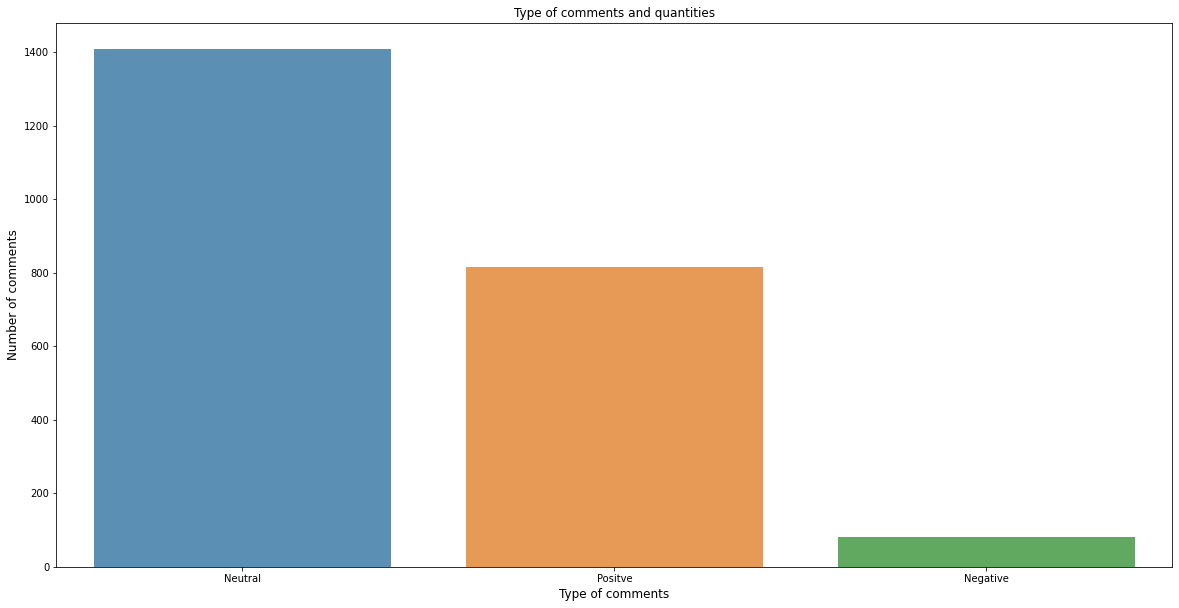

In [14]:
graphGenerator.genera_grafica_barras(comments, values, "Type of comments and quantities", "Type of comments", "Number of comments")

In [15]:
# Now we are going to see wich are the most frequent words in the comments
nlp_processor = NLP('english')

{'re', 'of', 'now', "couldn't", 'be', 'nor', 'not', 'an', 'through', 'does', 'in', "weren't", 'i', 'under', 'themselves', 'didn', "mightn't", 'd', "that'll", 'did', 'but', 'own', 'me', 'further', 'again', "should've", 'who', 'my', "shan't", 'your', 'y', 'out', "you're", 'or', 'other', 'such', 'no', 'its', 'between', 'aren', "won't", "aren't", 'we', 'ourselves', 'if', 'this', 'while', 'isn', 'why', 'off', 't', "didn't", 'both', 'weren', 'so', 'ours', 's', 'before', 've', "needn't", 'his', 'she', 'where', 'too', 'can', 'a', 'herself', 'until', 'being', 'they', 'itself', 'with', 'few', 'over', 'down', 'about', 'him', 'has', 'more', "you'll", 'up', 'couldn', 'wouldn', 'myself', 'whom', 'are', 'you', 'from', 'haven', 'it', 'all', 'don', 'yours', 'each', 'her', 'on', 'below', 'have', 'shouldn', 'been', 'm', 'for', 'hadn', 'then', "haven't", 'most', 'them', 'as', 'is', 'because', 'should', 'shan', 'needn', "you've", 'our', 'here', 'o', "she's", 'any', 'ain', 'theirs', 'their', "shouldn't", 'o

In [22]:
words_frequency = nlp_processor.top_frequent_words_in_replies(MV_replies, 1000)
words_frequency

FreqDist({'max': 296, 'win': 80, 'race': 69, 'congratul': 67, 'de': 61, 'congrat': 60, 'go': 55, 'love': 49, 'great': 44, 'good': 41, ...})

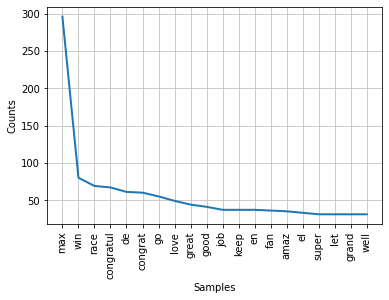

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
words_frequency.plot(20)